In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
img_size = 224
batch_size = 32
epochs = 5
train_path = '/content/drive/My Drive/ASL-recognition/asl_alphabet_train/asl_alphabet_train'

test_path = '/content/drive/My Drive/ASL-recognition/asl_alphabet_test/asl_alphabet_test'

In [ ]:
augment_train_data = ImageDataGenerator(horizontal_flip=True,
                                        rotation_range=50,
                                        zoom_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        rescale=1./255,
                                        validation_split=0.1)

augment_test_data = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = augment_train_data.flow_from_directory(train_path,
                                                       shuffle=True,
                                                       classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                                'L', 'M', 'N',
                                                                'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                                'Z', 'space',
                                                                'del', 'nothing'],
                                                       target_size=(
                                                           img_size, img_size),
                                                       batch_size=batch_size)

Found 87185 images belonging to 29 classes.


In [ ]:
test_dataset = augment_train_data.flow_from_directory(test_path,
                                                      classes=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K',
                                                               'L', 'M', 'N',
                                                               'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y',
                                                               'Z', 'space', 'del', 'nothing'],
                                                      target_size=(
                                                          img_size, img_size),
                                                      batch_size=batch_size)

Found 28 images belonging to 29 classes.


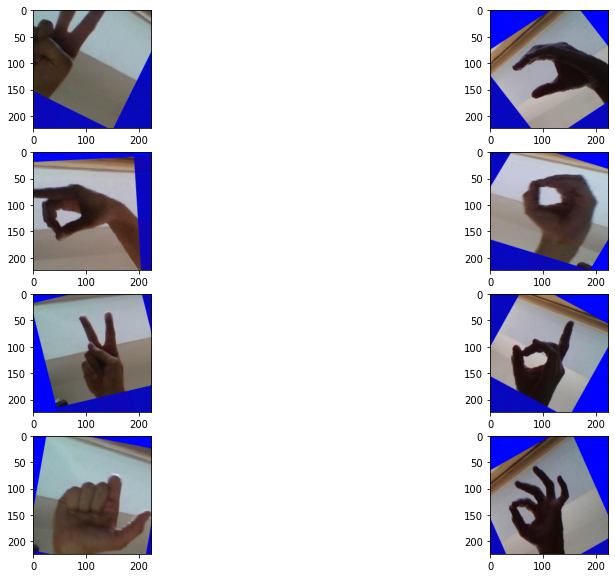

In [ ]:
fig = plt.figure(figsize=(15, 10))
for i in range(1,9):
    plt.subplot(4,2,i)
    plt.imshow(train_dataset[0][0][i-1])
plt.show()

In [ ]:
url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

download_model = hub.KerasLayer(url,input_shape=(img_size,img_size,3))

model = Sequential([
    download_model,
    Dense(29),
    Activation("softmax")
])

In [ ]:
model.compile(optimizer=Adam(1e-3),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
print("\n Model summary: ")
print(model.summary())

print("\n Model Training: ")
model.fit(train_dataset,
          batch_size=batch_size,
          epochs=epochs)


 Model summary: 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                29058     
_________________________________________________________________
activation_1 (Activation)    (None, 29)                0         
Total params: 3,569,323
Trainable params: 29,058
Non-trainable params: 3,540,265
_________________________________________________________________
None

 Model Training: 
Epoch 1/5
2725/2725 [==============================] - 22476s 8s/step - loss: 1.2088 - accuracy: 0.6535
Epoch 2/5
2725/2725 [==============================] - 3768s 1s/step - loss: 0.5603 - accuracy: 0.8254
Epoch 3/5
2725/2725 [==============================] - 3761s 1s/step - loss: 0.5093 - accuracy: 0.8412
Epoch 4/5
2725/27

In [ ]:
print("\n Model Evaluation: ")
model.evaluate(test_dataset)


 Model Evaluation: 
1/1 [==============================] - 2s 2s/step - loss: 0.2692 - accuracy: 0.9643


[0.2692463994026184, 0.9642857313156128]

In [ ]:
model.save("/content/drive/My Drive/ASL-recognition/h5/asl_model.h5")

In [ ]:
# model.save("/content/drive/My Drive/ASL-recognition/model/")

INFO:tensorflow:Assets written to: /content/drive/My Drive/ASL-recognition/model/assets


INFO:tensorflow:Assets written to: /content/drive/My Drive/ASL-recognition/model/assets


In [ ]:
load_model = tf.keras.models.load_model("/content/drive/My Drive/ASL-recognition/h5/asl_model.h5",custom_objects={"KerasLayer":hub.KerasLayer})
print(load_model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1001)              3540265   
_________________________________________________________________
dense_1 (Dense)              (None, 29)                29058     
_________________________________________________________________
activation_1 (Activation)    (None, 29)                0         
Total params: 3,569,323
Trainable params: 29,058
Non-trainable params: 3,540,265
_________________________________________________________________
None


In [ ]:
# model.predict(test_dataset[0][0])

array([[1.94154069e-04, 5.62679281e-09, 4.62899857e-11, 1.77175830e-09,
        2.87557214e-06, 7.89835664e-09, 6.56133625e-06, 1.33152407e-05,
        3.66742097e-05, 1.60135727e-07, 3.84696115e-08, 5.90253057e-06,
        7.68760085e-01, 2.30728105e-01, 1.70887603e-07, 3.06090014e-11,
        2.39036395e-12, 5.08778228e-11, 1.89533639e-05, 2.31225815e-04,
        3.19080901e-10, 3.38703887e-09, 1.85467544e-11, 8.15807539e-07,
        5.32719298e-07, 2.61772271e-07, 1.43543077e-11, 7.79026337e-08,
        6.40585819e-16],
       [2.53565002e-10, 7.50619478e-08, 7.27930640e-08, 7.62594223e-04,
        2.90114940e-06, 1.51748500e-05, 5.22485170e-05, 1.86576699e-06,
        8.86018315e-05, 1.53547504e-07, 2.62399027e-07, 6.60889066e-10,
        8.92188753e-12, 3.48590878e-11, 9.98898983e-01, 5.69004260e-06,
        1.00603117e-07, 1.66063230e-09, 5.34179662e-07, 1.35971422e-04,
        1.55204725e-06, 1.45344465e-08, 1.28680952e-07, 1.36277336e-07,
        1.09517009e-06, 3.17802442e-05,